# Midpoint Method for IVP

For step size h = 0.25

In [8]:
import numpy as np

### Set up ###

# f: ODE, y0: initial condition, h: step size
f = lambda t, y : 1 + (y/t)
y0 = 2
h = 0.25

# domain interval
t0 = 1
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t
t_25 = np.linspace(t0,T, mesh)

# y
y_25 = np.zeros((mesh))
y_25[0] = y0

### Midpoint Method ###
for i in range(0, len(t_25)-1):
    y_star = y_25[i] + (h/2.0)*f(t_25[i],y_25[i])
    y_25[i+1] = y_25[i] + h*f(t_25[i] + (h/2.0), y_star)
    

print(y_25)



[2.         2.77777778 3.60606061 4.47630148 5.38243978]


In [14]:
def midpoint(h):
    ### Set up ###

    # f: ODE, y0: initial condition, h: step size
    f = lambda t, y : 1 + (y/t)
    y0 = 2

    # domain interval
    t0 = 1
    T = 2
    interval = T-t0

    # number of mesh points (N+1)
    N = interval/h
    mesh = int(N+1)

    # generating t
    t_25 = np.linspace(t0,T, mesh)

    # y
    y_25 = np.zeros((mesh))
    y_25[0] = y0

    ### Midpoint Method ###
    for i in range(0, len(t_25)-1):
        y_star = y_25[i] + (h/2.0)*f(t_25[i],y_25[i])
        y_25[i+1] = y_25[i] + h*f(t_25[i] + (h/2.0), y_star)
    
    return(y_25[len(y_25)-1])

h=0.1
numerator = midpoint(h) - midpoint(h/2)
denom = midpoint(h/2) - midpoint(h/4)

big_numerator = np.log(numerator/denom)
big_denom = np.log(2)

final = big_numerator/big_denom

print(final)

1.997057595498413


For step size h = 0.1

In [3]:
### Set up ###

# f: ODE, y0: initial condition, h: step size
f = lambda t, y : 1 + (y/t)
y0 = 2
h = 0.1

# domain interval
t0 = 1
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t
t_1 = np.linspace(t0,T, mesh)

# y
y_1 = np.zeros((mesh))
y_1[0] = y0

### Midpoint Method ###
for i in range(0, len(t_1)-1):
    y_star = y_1[i] + (h/2.0)*f(t_1[i],y_1[i])
    y_1[i+1] = y_1[i] + h*f(t_1[i] + (h/2.0), y_star)
    

print(y_1)




[2.         2.3047619  2.61863354 2.940853   3.27077617 3.60785131
 3.95160054 4.30160588 4.65749866 5.01895129 5.38567072]


We are told that this IVP has the analytical solution $y(t) = tlogt + 2t$. Now we will bve comparing the analytical solution to the numerical solutions we just obtained

This is the numerical solution for step size 0.25
[2.         2.77777778 3.68460111 4.72581125 5.90655093]
This is the numerical solution for step size 0.1
[2.         2.3047619  2.61863354 2.940853   3.27077617 3.60785131
 3.95160054 4.30160588 4.65749866 5.01895129 5.38567072]
-----------------------------------------------


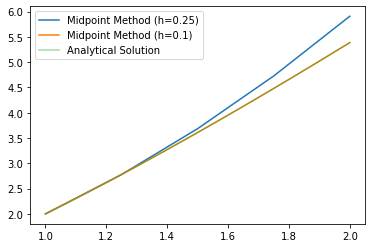

In [32]:
import matplotlib.pyplot as plt


print("This is the numerical solution for step size 0.25")
print(y_25)

print("This is the numerical solution for step size 0.1")
print(y_1)

print("-----------------------------------------------")

# Analytical Solution
y_analytical = lambda t: (t * np.log(t)) + (2*t)
t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)

plt.plot(t_25, y_25, label="Midpoint Method (h=0.25)")
plt.plot(t_1, y_1, label="Midpoint Method (h=0.1)")
plt.plot(t_act, y_act, label = "Analytical Solution", alpha=0.41)
plt.legend()

## Absolute / Global Truncation Error 

In [45]:

# For h = 0.25
print("This is the numerical solution for step size 0.25")
print(y_25)
print("This is the analytical solution for step size 0.25")
y_analytical_25 = y_analytical(t_25)
print(y_analytical_25)
print("This is the Global Truncation Error at each step")
print(np.abs(y_analytical_25-y_25))
print("-----------------------------------------------")


# For h = 0.1
print("This is the numerical solution for step size 0.1")
print(y_1)
print("")
print("This is the analytical solution for step size 0.1")
y_analytical_1 = y_analytical(t_1)
print(y_analytical_1)
print("")
print("This is the Global Truncation Error at each step")
print(np.abs(y_analytical_1-y_1))


This is the numerical solution for step size 0.25
[2.         2.77777778 3.68460111 4.72581125 5.90655093]
This is the analytical solution for step size 0.25
[2.         2.77892944 3.60819766 4.47932763 5.38629436]
This is the Global Truncation Error at each step
[0.         0.00115166 0.07640345 0.24648362 0.52025657]
-----------------------------------------------
This is the numerical solution for step size 0.1
[2.         2.3047619  2.61863354 2.940853   3.27077617 3.60785131
 3.95160054 4.30160588 4.65749866 5.01895129 5.38567072]

This is the analytical solution for step size 0.1
[2.         2.3048412  2.61878587 2.94107354 3.27106113 3.60819766
 3.95200581 4.30206803 4.658016   5.01952238 5.38629436]

This is the Global Truncation Error at each step
[0.00000000e+00 7.92930229e-05 1.52327780e-04 2.20541737e-04
 2.84963798e-04 3.46349723e-04 4.05267073e-04 4.62150323e-04
 5.17337691e-04 5.71096385e-04 6.23640300e-04]


# Euler Method IVP

[1.         1.         1.00243647 1.00705653 1.01361416 1.02187025
 1.03159256 1.04255576 1.0545415  1.06733839 1.0807421  1.0945554
 1.10858822 1.12265771 1.13658834 1.15021192 1.1633677  1.17590246
 1.18767051 1.19853383 1.20836207 1.21703263 1.22443071 1.23044935
 1.23498945 1.23795982 1.23927718 1.23886617 1.23665936 1.23259724
 1.22662817 1.21870837 1.20880188 1.19688049 1.18292367 1.1669185
 1.14885957 1.12874887 1.10659567 1.08241642 1.05623454]


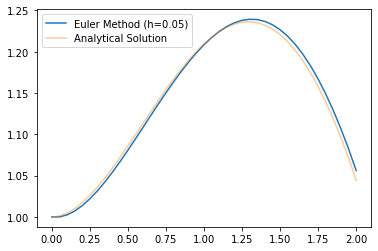

In [50]:
### Set up ###

# f: ODE, y0: initial condition, h: step size
f = lambda t, y : (-y) + np.sin(t) + np.cos(t)
y0 = 1
h = 0.05

# domain interval
t0 = 0
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t
t = np.linspace(t0,T, mesh)

# y
y = np.zeros((mesh))
y[0] = y0

### Eulers Method ###
for i in range(0, len(t)-1):
    y[i+1] = y[i] + h*f(t[i],y[i])

print(y)

# Analytical Solution
y_analytical = lambda t: np.sin(t) + np.exp(-t)

t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)

plt.plot(t, y, label="Euler Method (h=0.05)")
plt.plot(t_act, y_act, label = "Analytical Solution", alpha=0.41)
plt.legend()



# 4th order Runge-Kutta method (RK4)

[1.         1.0012086  1.00467084 1.01014611 1.01740009 1.02620475
 1.03633843 1.0475859  1.05973839 1.07259369 1.0859562  1.09963704
 1.11345411 1.12723218 1.14080299 1.15400531 1.16668505 1.17869533
 1.18989656 1.20015652 1.20935042 1.21736096 1.22407843 1.2294007
 1.23323328 1.2354894  1.23608996 1.2349636  1.23204667 1.22728326
 1.22062512 1.21203171 1.2014701  1.18891491 1.17434831 1.15775986
 1.13914649 1.11851234 1.09586868 1.07123376 1.04463268]
41


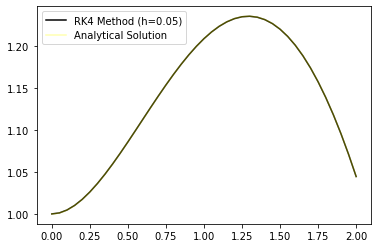

In [63]:
# set up
f = lambda t, y : (-y) + np.sin(t) + np.cos(t)
y0 = 1
h = 0.05

# domain interval
t0 = 0
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t
t = np.linspace(t0,T, mesh)

# y
y = np.zeros((mesh))
y[0] = y0

####### RK4 method #######
for i in range(0, len(t)-1):
    S1 = f(t[i],y[i])
    S2 = f(t[i]+(h/2.0), y[i]+((h/2.0)*S1))
    S3 = f(t[i]+(h/2.0), y[i]+((h/2.0)*S2))
    S4 = f(t[i]+h, y[i]+(h*S3))
    y[i+1] = y[i] + (h/6.0)*(S1 + (2*S2) + (2*S3) + S4)

# Analytical Solution
y_analytical = lambda t: np.sin(t) + np.exp(-t)

t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)

plt.plot(t, y, label="RK4 Method (h=0.05)", color = "black")
plt.plot(t_act, y_act, label = "Analytical Solution", alpha=0.31, color="yellow")
plt.legend()

print(y)
print(len(y))